## 3회

# 기계학습 (60점)

### 가공식품의 영양성분표 데이터
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m1.csv    
출처 : https://www.data.go.kr/data/15047698/fileData.do 후처리     

- 식품명 : {카테고리}_제품명 순서로 작성된다. unique한 카테고리는 5개 (라면,시리얼,식빵,아이스밀크,잼)이다. 
    - 식품명은 군집분석 모델링을 할 때 사용하지 않는다.
- 업체명 : 업체명
- 그 외 : 해당 컬럼명의 정량적인 값

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m1.csv')
df.head()

,식품명,에너지(kcal),영양성분함량기준량,수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),...,베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),업체명
0,라면_스낵면Cup,427,100g,0.0,8.06,14.52,0.0,66.13,4.84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.48,0.0,"오뚜기라면(주),해당없음,해당없음"
1,라면_준코라면,417,100g,0.0,8.33,12.50,0.0,67.50,4.17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.67,0.0,"(주)팔도,해당없음,해당없음"
2,라면_오뚜기김치면,429,100g,0.0,8.57,13.33,0.0,68.57,3.81,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.67,0.0,"오뚜기라면(주),해당없음,해당없음"
3,라면_오뚜기 마열라면,438,100g,0.0,10.48,15.24,0.0,64.76,2.86,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.62,0.0,"오뚜기라면(주),해당없음,해당없음"
4,라면_컵삼양라면,454,100g,0.0,7.69,18.46,0.0,64.62,3.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.23,0.0,"삼양식품(주),해당없음,해당없음"


### 기계학습1    
시각화 및 EDA

In [4]:
pd.set_option('display.max_columns',300)

In [5]:
df

,식품명,에너지(kcal),영양성분함량기준량,수분(g),단백질(g),지방(g),회분(g),탄수화물(g),당류(g),식이섬유(g),칼슘(mg),철(mg),인(mg),칼륨(mg),나트륨(mg),비타민 A(μg RAE),레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),업체명
0,라면_스낵면Cup,427,100g,0.0,8.06,14.52,0.0,66.13,4.84,0.0,0.0,0.0,0.0,0.0,1935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.48,0.0,"오뚜기라면(주),해당없음,해당없음"
1,라면_준코라면,417,100g,0.0,8.33,12.50,0.0,67.50,4.17,0.0,0.0,0.0,0.0,0.0,1525.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.67,0.0,"(주)팔도,해당없음,해당없음"
2,라면_오뚜기김치면,429,100g,0.0,8.57,13.33,0.0,68.57,3.81,0.0,0.0,0.0,0.0,0.0,1371.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.67,0.0,"오뚜기라면(주),해당없음,해당없음"
3,라면_오뚜기 마열라면,438,100g,0.0,10.48,15.24,0.0,64.76,2.86,0.0,131.0,0.0,0.0,0.0,1524.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.62,0.0,"오뚜기라면(주),해당없음,해당없음"
4,라면_컵삼양라면,454,100g,0.0,7.69,18.46,0.0,64.62,3.08,0.0,0.0,0.0,0.0,0.0,1785.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.23,0.0,"삼양식품(주),해당없음,해당없음"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,잼_5페퍼가들어있는블루베리잼,206,100g,0.0,0.40,0.10,0.0,51.00,49.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,"해당없음,FAVOLS SAS,해당없음"
1846,잼_OnlyPrice깔끔하게짜먹는딸기잼,251,100g,0.0,0.00,1.70,0.0,58.80,57.20,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(주)자미원,해당없음,해당없음"
1847,잼_OnlyPrice깔끔하게짜먹는블루베리잼,242,100g,0.0,0.00,0.00,0.0,60.00,54.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"(주)자미원,해당없음,해당없음"
1848,잼_건담딸기잼,278,100g,0.0,1.00,0.00,0.0,68.50,36.00,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,"농업회사법인데이웰(주),해당없음,해당없음"


### 기계학습2
식품명을 모르는 상태에서 영양성분표를 바탕으로 데이터를 군집화 작업을 하려한다.      
군집 모델링 전 차원 축소가 필요한지 확인하고 필요하다면 그 근거를 작성하고 차원축소를 진행하라.      

In [11]:
t = df.drop(columns =['식품명','영양성분함량기준량','업체명'])

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

##########데이터 로드

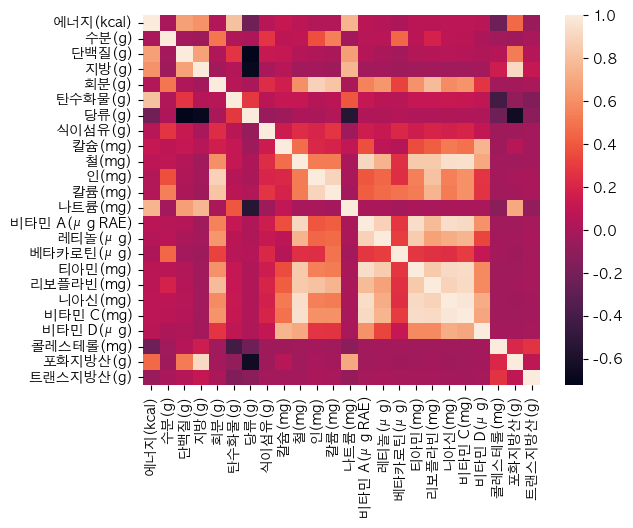

In [20]:
sns.heatmap(t.corr())
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [52]:
pca = PCA()

In [53]:
pca.fit(MinMaxScaler().fit_transform(t))

PCA()

In [54]:
g = pd.DataFrame(pca.explained_variance_ratio_,columns =['분산설명력'])
g['cumsum'] = g['분산설명력'].cumsum()

In [56]:
pca_df = pca.fit_transform(MinMaxScaler().fit_transform(t))[:,:5]

### 기계학습3      
위에서 전처리한 데이터를 기준으로 Kmeans 군집을 실시하라. 최적의 군집 수를 도출한 근거를 설명하라.         
해당 군집 결과를 PCA를 진행한 두개의 축위에 각 클러스터별 다른 색상으로 산점도를 그려라.

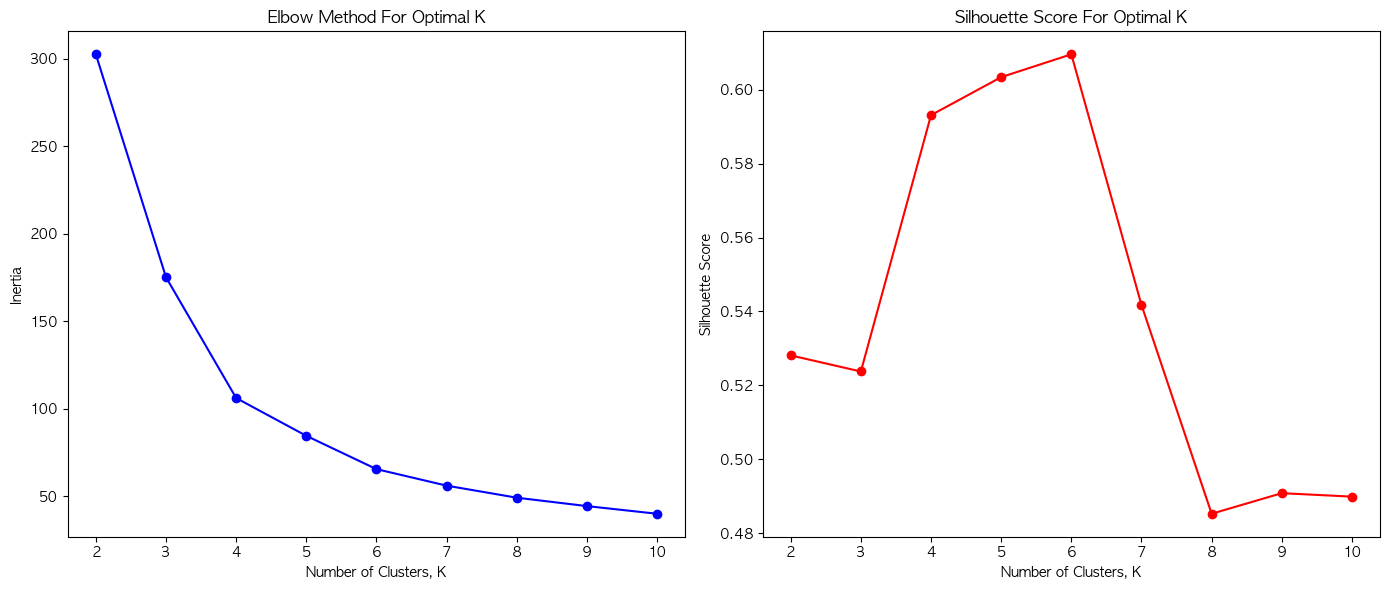

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# 엘보우 방법과 실루엣 점수 계산
inertia_list = []
silhouette_scores = []
K_range = range(2, 11)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=1).fit(pca_df)
    inertia_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_df, kmeans.labels_))

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_list, 'bo-')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters, K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')

plt.tight_layout()
plt.show()


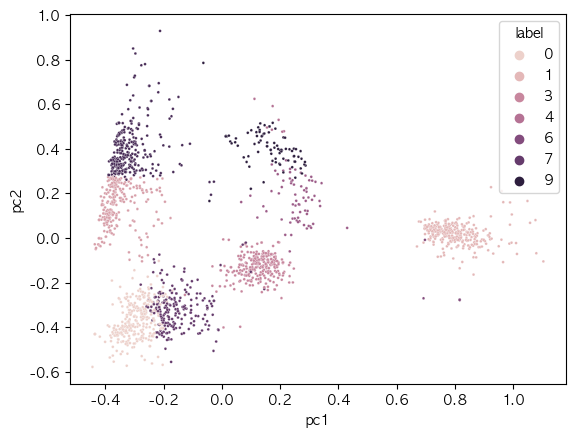

In [117]:
pre_df = pd.DataFrame()
pre_df[['pc1','pc2']] = pca_df[:,:2]
pre_df['label'] = kmeans.labels_

pre_df['target'] = df['식품명'].str.split('_').str[0]
sns.scatterplot(x= pre_df['pc1'],y = pre_df['pc2'] ,hue = pre_df['label'],s=4)
plt.show()

### 기계학습4
2에서 전처리한 데이터를 3에서 추출한 최적군집 숫자로 계층적 군집분석을 실시하라.    
모델링시 군집간 거리 4가지 방법(최소값,최대값,평균간 거리, 평균)으로 다르게 하여 군집분석을 실시하고    
3에서 추출한 PCA 축상에 군집별 산점도를 출력하라

In [104]:
import numpy as np
from sklearn.datasets import load_iris
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


linkage_methods = ['single'# 최소
                   , 'complete' #최대
                   , 'average' #평균
                   , 'centroid' #평균간 거리
                  ]
num_clusters = 7


lst = {}
for linkage_method in linkage_methods:
    Z = sch.linkage(pca_df, method=linkage_method)
    clusters = sch.fcluster(Z, num_clusters, criterion='maxclust')
    
    lst[linkage_method] = pd.Series(clusters)

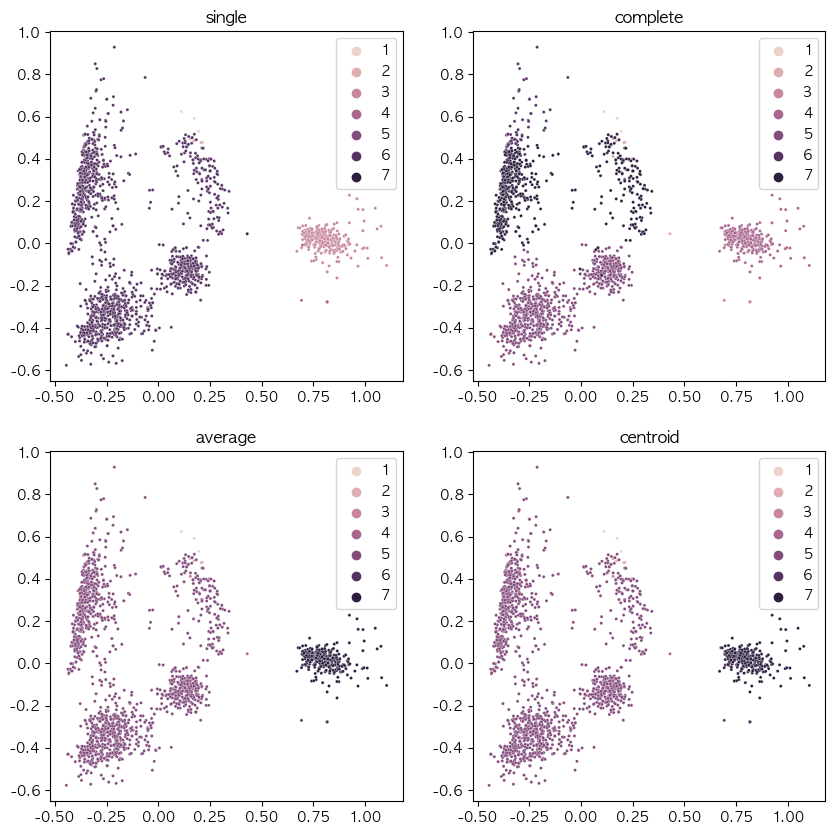

In [116]:
fig,axes = plt.subplots(2,2,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    sns.scatterplot(x=pca_df[:,0],y=pca_df[:,1],hue = lst[linkage_methods[i]],ax=ax,s=5)
    ax.set_title(linkage_methods[i])
plt.show()

### 기계학습5
3,4에서 도출한 5개의 군집 결과 그래프와 실제 식품명의 카테고리를 비교 분석하여 이전 군집 분석에 대한 결과를 정리하라     

In [119]:
display(pd.crosstab(pre_df['target'],pre_df['label']))

label,0,1,2,3,4,5,6,7,8,9
target,,,,,,,,,,
라면,1,310,0,0,0,0,0,0,0,0
시리얼,0,0,0,2,7,68,2,0,0,81
식빵,3,0,0,268,0,2,4,1,0,1
아이스밀크,298,0,9,0,0,0,0,217,0,0
잼,0,0,263,0,0,0,0,0,311,2


### 서울특별시 전월세가
dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m2.csv    
출처 : https://data.seoul.go.kr/dataList/OA-21276/S/1/datasetView.do 후처리    
        
23년도 강서구의 전월세 실거래가 데이터이다.    
데이터를 바탕으로 총 소모비용 ( 보증금 + 임대료 * 계약기간(월))을 예측하는 모델을 만들려고 한다.

In [141]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_m2.csv')

In [150]:
df['end'] = pd.to_datetime(df['계약기간'].str.split('~').str[1],format='%y.%m')
df['start'] = pd.to_datetime(df['계약기간'].str.split('~').str[0],format='%y.%m')

In [160]:
df

,자치구명,법정동명,지번,층,계약일,전월세구분,보증금(만원),임대료(만원),건축년도,건물용도,계약기간,임대평수,end,start
0,강서구,화곡동,343-66,2,20230102,월세,1000,60,2004.0,오피스텔,23.01~25.01,8.1,2025-01-01,2023-01-01
1,강서구,화곡동,343-66,2,20230211,월세,1000,60,2004.0,오피스텔,23.02~24.02,8.4,2024-02-01,2023-02-01
2,강서구,화곡동,402-4,4,20230208,월세,2000,55,2000.0,오피스텔,23.03~25.03,11.5,2025-03-01,2023-03-01
3,강서구,가양동,1479-2,6,20230702,월세,500,42,2005.0,오피스텔,23.07~24.07,6.1,2024-07-01,2023-07-01
4,강서구,화곡동,343-66,2,20230401,월세,500,60,2004.0,오피스텔,23.05~24.05,8.3,2024-05-01,2023-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25525,강서구,화곡동,424-23,4,20231207,전세,16000,0,2016.0,연립다세대,24.02~26.02,9.6,2026-02-01,2024-02-01
25526,강서구,화곡동,105-357,5,20231207,전세,21500,0,2018.0,연립다세대,23.12~25.12,7.4,2025-12-01,2023-12-01
25527,강서구,화곡동,1091-0,11,20231207,전세,61000,0,2002.0,아파트,23.12~25.12,25.7,2025-12-01,2023-12-01
25528,강서구,화곡동,410-296,4,20231207,전세,12500,0,2001.0,연립다세대,24.01~26.01,14.1,2026-01-01,2024-01-01


In [152]:
def del_month(x):
    return x

### 기계학습5
시각화를 포함한 EDA

### 기계학습6
모델링을 위한 데이터 전처리를 시행하라. 추가로 건물용도 마다 각각 여러 수치형변수(임대평수, 건물 건축 기간(2024년기준), 소모비용)간의 통계적 차이가 있는지 확인하라    

### 기계학습7
xgb,lightgbm,randomforest 각 모델을 학습하고 각 모델별로 주요 변수들을 확인하고 해석하라

# 통계 (40점)

### 통계1     
학교내 학생들의 시험 점수를 나타낸 것이다. 성별과 학년이 점수에 대해 가지는 주효과 교호작용효과를 알아보고자 한다.    
(1) 주효과와 교호작용 효과에 대한 가설 설정     
(2) 통계검정을 사용하기 위한 사전 조건 확인    
(3) 통계검정

In [4]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_s4.csv')
df.head()

,성별,학년,점수
0,남학생,1학년,70
1,남학생,1학년,76
2,남학생,1학년,78
3,남학생,1학년,67
4,남학생,1학년,71


In [5]:
import pandas as pd

In [6]:
from scipy.stats import shapiro
result = df.groupby(['성별','학년'])['점수'].apply(lambda x : shapiro(x).pvalue).reset_index()
result = result.rename(columns={'점수':'p-value'})
result

,성별,학년,p-value
0,남학생,1학년,0.834558
1,남학생,2학년,0.101497
2,남학생,3학년,0.816518
3,여학생,1학년,0.999749
4,여학생,2학년,0.188080
5,여학생,3학년,0.772171


In [7]:
from scipy.stats import shapiro
result = df.groupby(['성별','학년'])['점수'].apply(lambda x : shapiro(x).pvalue).reset_index()
result = result.rename(columns={'점수':'p-value'})
result

,성별,학년,p-value
0,남학생,1학년,0.834558
1,남학생,2학년,0.101497
2,남학생,3학년,0.816518
3,여학생,1학년,0.999749
4,여학생,2학년,0.188080
5,여학생,3학년,0.772171


In [8]:
from scipy.stats import levene
grps = []
for name, g in df.groupby(['성별','학년']):
    grps.append(g['점수'])
levene(*grps)

LeveneResult(statistic=0.7159090909090906, pvalue=0.6164463698916796)

In [9]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
model = ols(formula='점수 ~ C(성별)*C(학년)', data=df,).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(성별),1.0,13.444444,13.444444,0.829335,0.369724
C(학년),2.0,478.166667,239.083333,14.748115,0.000035
C(성별):C(학년),2.0,174.055556,87.027778,5.368403,0.010163
Residual,30.0,486.333333,16.211111,NaN,NaN


In [139]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#사후분석 - Tukey HSD
tukey = pairwise_tukeyhsd(df['점수'], groups=df['성별'] + "-" + df['학년'], alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
남학생-1학년,남학생-2학년,1.5,0.9864,-5.5704,8.5704,False
남학생-1학년,남학생-3학년,-3.3333,0.7067,-10.4038,3.7371,False
남학생-1학년,여학생-1학년,7.1667,0.0455,0.0962,14.2371,True
남학생-1학년,여학생-2학년,1.3333,0.992,-5.7371,8.4038,False
남학생-1학년,여학생-3학년,-6.6667,0.0735,-13.7371,0.4038,False
남학생-2학년,남학생-3학년,-4.8333,0.3247,-11.9038,2.2371,False
남학생-2학년,여학생-1학년,5.6667,0.1757,-1.4038,12.7371,False
남학생-2학년,여학생-2학년,-0.1667,1.0,-7.2371,6.9038,False
남학생-2학년,여학생-3학년,-8.1667,0.0163,-15.2371,-1.0962,True
남학생-3학년,여학생-1학년,10.5,0.0012,3.4296,17.5704,True


### 통계2      
일자별 장마감시간의 주식의 상승과 하락을 추적한 데이터이다.     
주가 변동이 무작위 인지 특정 경향성을 가지는지 통계적으로 확인하려 한다.       

(1) 가설설정     
(2) 검정 통계량 확인 및 분석     

dataurl = https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_s2.csv

In [125]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/mock/003_s2.csv',index_col=0)
df.head()

,Price Change
2024-01-01,상승
2024-01-02,하락
2024-01-03,상승
2024-01-04,상승
2024-01-05,하락


In [132]:
from statsmodels.sandbox.stats.runs import runstest_1samp

data = ['상승', '하락', '상승', '상승', '하락', '하락', '상승', '하락', '상승', '하락', '하락',
        '상승', '상승', '상승', '하락', '상승', '하락', '상승', '하락', '상승']
coded_data = [1 if x == '상승' else 0 for x in df['Price Change']]

#귀무가설: 주식의 상승과 하락은 무작위
#연구가설: 주식의 상승과 하락은 무작위가 아니다
runs_count, runs_pvalue = runstest_1samp(coded_data)

print(f"Number of runs: {runs_count}")
print(f"p-value: {runs_pvalue:.4f}")


Number of runs: 1.671732172810527
p-value: 0.0946


In [3]:
# run test

### 통계3    
연구자가 새로운 수면 개선 약을 개발했으며, 이 약의 효과를 검증하기 위해 10명의 피험자에게 일주일 동안 매일 밤 약을 복용하도록 하고, 복용 전과 복용 후의 평균 수면 시간을 비교했다. 연구자는 약이 수면 시간에 유의미한 변화를 가져다주었는지 확인하고 싶어 한다.      
(1) 가설 설정     
(2) 통계 검정

| 피험자 | 복용 전 평균 수면 시간(시간) | 복용 후 평균 수면 시간(시간) |
|---|------------------|------------------|
| 1 | 6 | 7 |
| 2 | 7 | 8 |
| 3 | 6.5 | 6.8 |
| 4 | 5 | 6.5 |
| 5 | 7 | 7.5 |
| 6 | 5.5 | 5 |
| 7 | 6.7 | 7 |
| 8 | 6.2 | 6.8 |
| 9 | 7 | 7.2 |
| 10 | 5.5 | 6 |

In [126]:
# 순위부호검정 (wilcoxon signed_rank test)
from scipy.stats import wilcoxon

### 통계4
학생 20명을 무작위로 두 그룹으로 나누어 카페인이 학습에 효과가 있는지 확인하려한다. 두 그룹간의 평균 점수 차이가 존재하는지 확인하라    
카페인 그룹 테스트 점수: [88, 92, 94, 95, 96, 97, 91, 93, 98, 94]     
플라시보 그룹 테스트 점수: [81, 83, 84, 88, 86, 85, 87, 82, 80, 83]    
 
(1) 가설설정    
(2) 검정

In [127]:
from scipy.stats import ttest_ind
#독립표본 T검정